3. Реализовать балансировку красно-черного дерева

=====================================================

Красно-чёрное дерево (1972) — один из видов самобалансирующихся двоичных деревьев поиска, гарантирующих логарифмический рост высоты дерева от числа узлов и позволяющее быстро выполнять основные операции дерева поиска: добавление, удаление и поиск узла.

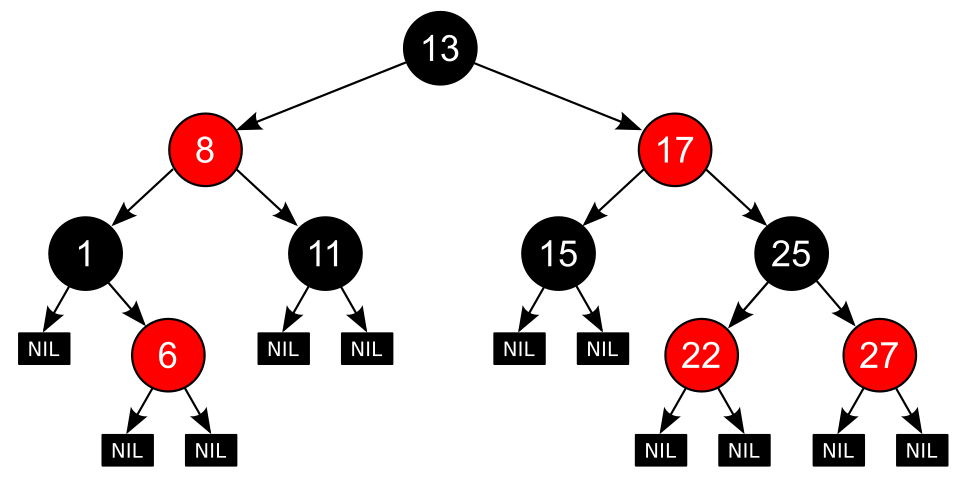

Свойства к-ч дерева:
1.  Узел может быть либо красным, либо чёрным.
2.  Корень всегда чёрный.
3.  Все листья (NIL) — чёрные.
4.  Оба потомка каждого красного узла — чёрные.
5.  Любой простой путь от узла-предка до листового узла-потомка содержит одинаковое число чёрных узлов.

Иллюстрация левого поворота:

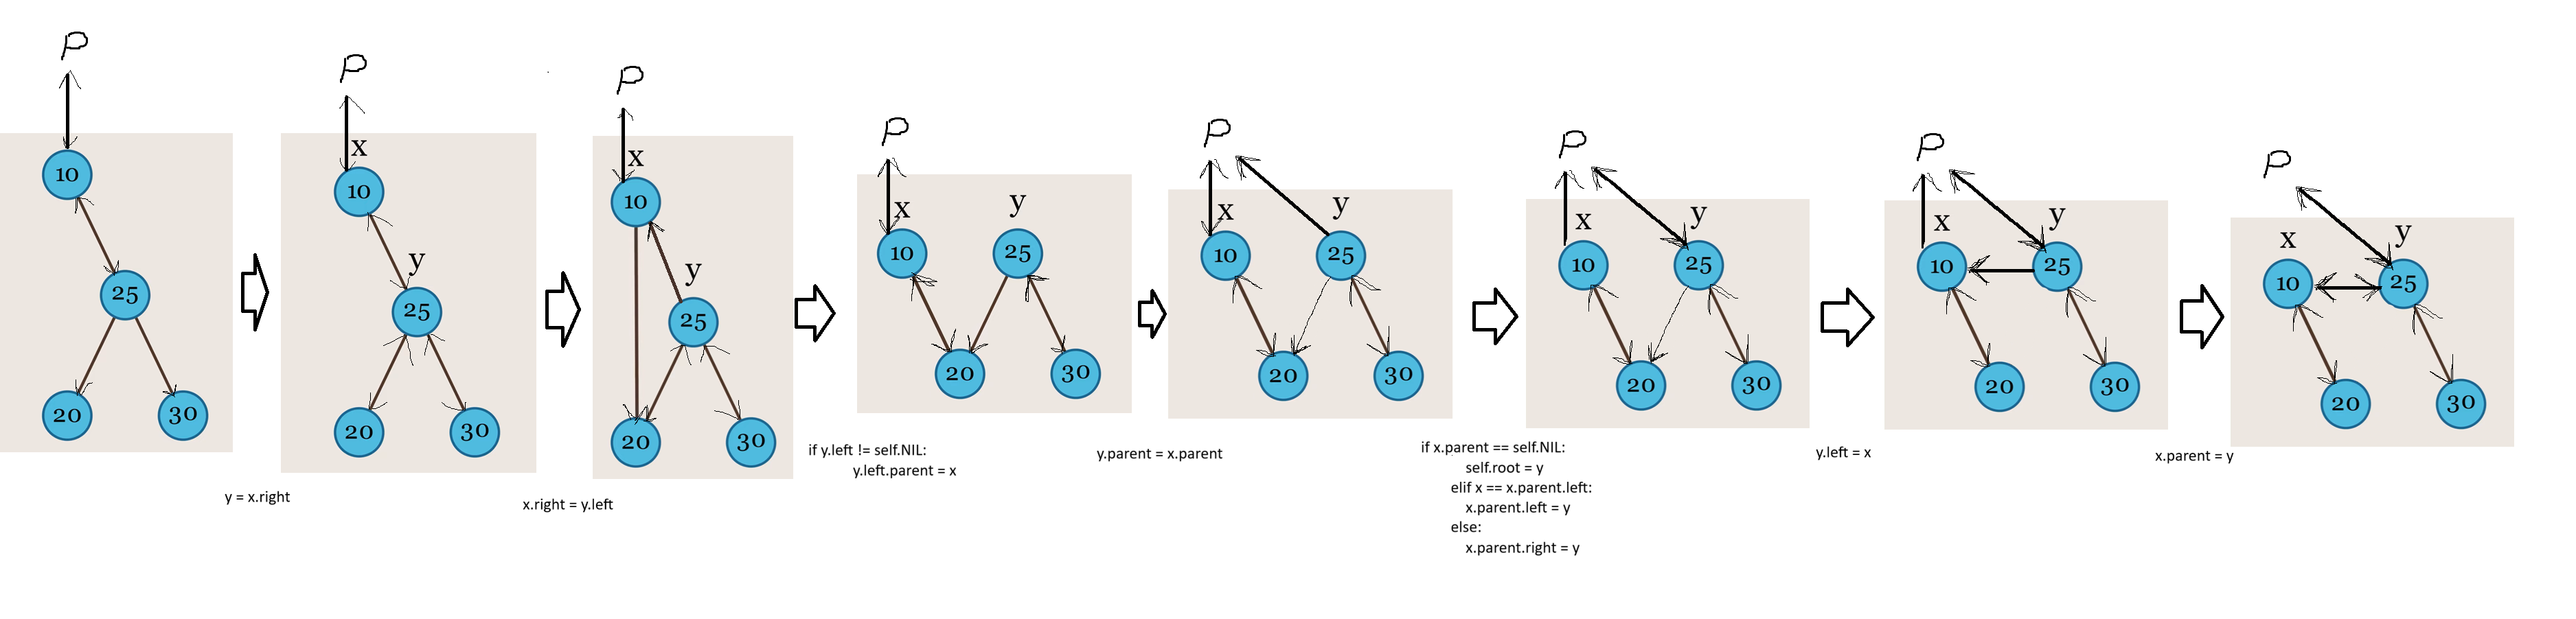

Блок-схема: Вставка (+ Fixup)

![alt text](chart.png)

Блок-схема: Удаление (+ Fixup)

![alt text](<chart (2).png>)

Ромб: Условие

Прямоугольник: Действие

Стрелки: Переход управления

In [17]:
class Node:
    def __init__(self, data, color="red"):
        self.data = data
        self.color = color  # Новые узлы всегда стараемся делать КРАСНЫМИ, 
                            # чтобы не нарушать "черную высоту"
        self.left = None
        self.right = None
        self.parent = None

In [ ]:
class RedBlackTree:
    def __init__(self):
        """
        Инициализация дерева с использованием NIL-ов - затычек
        """

        # Time: O(1)
        # Space: O(1)
        
        self.NIL = Node(data=None, color="black")
        self.root = self.NIL

    # --------------------------------------------
    # ВРАЩЕНИЯ
    # Операции O(1), меняющие структуру дерева для балансировки,
    # сохраняя при этом свойства бинарного дерева поиска (BST)
    # ---------------------------------------------

    def rotate_left(self, x):
        """
        Левый поворот вокруг узла x
        
        Сложность:
            Time: O(1) - выполняется фиксированное количество переназначений ссылок
            Space: O(1) - не требует дополнительной памяти
        """
        y = x.right             # y всплывает и становится родителем x
        
        # 1. Переносим левое поддерево y к x
        x.right = y.left
        
        # ВАЖНО: Обновляем parent только если это реальный узел, а не NIL
        # Мы не должны назначать родителя "пустоте"
        if y.left != self.NIL:
            y.left.parent = x

        # 2. Связываем y с бывшим родителем x
        y.parent = x.parent
        
        if x.parent is None:    # x был корнем
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
            
        # 3. Завершаем поворот: x становится левым ребенком y
        y.left = x
        x.parent = y

    def rotate_right(self, y):
        """
        Правый поворот вокруг узла y (зеркален левому)
        
        Сложность:
            Time: O(1)
            Space: O(1)
        """
        x = y.left
        y.left = x.right
        
        if x.right != self.NIL:
            x.right.parent = y
            
        x.parent = y.parent
        
        if y.parent is None:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
            
        x.right = y
        y.parent = x

    # ---------------------------------------------------------
    # ВСТАВКА
    # ---------------------------------------------------------

    def insert(self, data):
        """
        Вставка нового элемента
        
        Сложность:
            Time: O(log N) - спуск по дереву высоты h <= 2*log(N+1)
            Space: O(1) - итеративный спуск не требует доп памяти
        """
        new_node = Node(data=data)
        new_node.left = new_node.right = self.NIL

        parent = None
        current = self.root

        # 1. Стандартный спуск BST: O(height)
        while current != self.NIL:
            parent = current
            if new_node.data < current.data:
                current = current.left
            else:
                current = current.right

        # 2. Привязка узла
        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.data < parent.data:
            parent.left = new_node
        else:
            parent.right = new_node

        # 3. Восстановление свойств КЧД (новый узел всегда красный)
        self.fix_insert(new_node)

    def fix_insert(self, z):
        """
        Балансировка после вставки (устранение двух красных подряд).
        
        Сложность:
            Time: O(log N) - в худшем случае проблема "всплывает" до корня.
            Space: O(1).
        
        Примечание: Максимум 2 вращения, но O(log N) перекрашиваний.
        """
        while z.parent and z.parent.color == "red":
            
            # Случай A: Отец - левый ребенок деда
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right  # Дядя
                
                # Case 1: Дядя красный -> Перекраска
                if y.color == "red":
                    z.parent.color = "black"
                    y.color = "black"
                    z.parent.parent.color = "red"
                    z = z.parent.parent  # Поднимаемся на уровень деда
                
                # Case 2 & 3: Дядя черный -> Вращения
                else:
                    if z == z.parent.right: # Case 2: Зигзаг (Triangle)
                        z = z.parent
                        self.rotate_left(z)
                    
                    # Case 3: Линия (Line)
                    z.parent.color = "black"
                    z.parent.parent.color = "red"
                    self.rotate_right(z.parent.parent)
            
            # Случай B: Отец - правый ребенок деда (Зеркально)
            else:
                y = z.parent.parent.left
                
                if y.color == "red":
                    z.parent.color = "black"
                    y.color = "black"
                    z.parent.parent.color = "red"
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        z = z.parent
                        self.rotate_right(z)
                    
                    z.parent.color = "black"
                    z.parent.parent.color = "red"
                    self.rotate_left(z.parent.parent)
        
        self.root.color = "black" # Корень всегда черный

    # ---------------------------------------------------------
    # УДАЛЕНИЕ
    # ---------------------------------------------------------

    def transplant(self, u, v):
        """
        Метод для замены поддерева с корнем u на поддерево v
        
        Сложность:
            Time: O(1) - простое переназначение родительских ссылок
            Space: O(1)
        """
        if u.parent is None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        
        v.parent = u.parent

    def delete(self, data):
        """
        Удаление узла по значению
        
        Сложность:
            Time: O(log N) - поиск узла + поиск преемника + балансировка
            Space: O(1)
        """
        z = self.search(data) # Используем обновленный итеративный поиск
        if z == self.NIL:
            print("Value not found in the tree.")
            return

        y = z
        y_original_color = y.color
        
        # Случай 1: У z нет левого ребенка
        if z.left == self.NIL:
            x = z.right
            self.transplant(z, z.right)
        # Случай 2: У z нет правого ребенка
        elif z.right == self.NIL:
            x = z.left
            self.transplant(z, z.left)
        # Случай 3: У z два ребенка
        else:
            y = self.minimum(z.right) # Преемник
            y_original_color = y.color
            x = y.right
            
            if y.parent == z:
                x.parent = y
            else:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color

        # Если удалили (или переместили) черный узел, нужно восстановить баланс
        if y_original_color == "black":
            self.fix_delete(x)

    def fix_delete(self, x):
        """
        Восстановление "черной высоты" после удаления.
        
        Сложность:
            Time: O(log N) - подъем "двойной черноты" к корню
            Space: O(1)
            
        Примечание: Максимум 3 вращения для устранения дисбаланса.
        """
        while x != self.root and x.color == "black":
            
            # Ветка А: x - левый ребенок
            if x == x.parent.left:
                w = x.parent.right
                
                # Case 1: Брат красный -> Делаем брата черным
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.rotate_left(x.parent)
                    w = x.parent.right
                
                # Case 2: Оба племянника черные -> Снимаем черноту с обоих
                if w.left.color == "black" and w.right.color == "black":
                    w.color = "red"
                    x = x.parent
                else:
                    # Case 3: Ближний племянник красный -> Отодвигаем красноту
                    if w.right.color == "black":
                        w.left.color = "black"
                        w.color = "red"
                        self.rotate_right(w)
                        w = x.parent.right
                    
                    # Case 4: Дальний племянник красный -> Финальный поворот
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.right.color = "black"
                    self.rotate_left(x.parent)
                    x = self.root
            
            # Ветка B: x - правый ребенок (Зеркально)
            else:
                w = x.parent.left
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.rotate_right(x.parent)
                    w = x.parent.left
                if w.right.color == "black" and w.left.color == "black":
                    w.color = "red"
                    x = x.parent
                else:
                    if w.left.color == "black":
                        w.right.color = "black"
                        w.color = "red"
                        self.rotate_left(w)
                        w = x.parent.left
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.left.color = "black"
                    self.rotate_right(x.parent)
                    x = self.root
                    
        x.color = "black"

    # ---------------------------------------------------------
    # ВСПОМОГАТЕЛЬНЫЕ МЕТОДЫ
    # ---------------------------------------------------------
    
    def search(self, key):
        """
        Итеративный поиск узла
        
        Сложность:
            Time: O(log N) - проход по высоте дерева
            Space: O(1) - в отличие от рекурсии, не тратит память стека
        """
        current = self.root
        while current != self.NIL and key != current.data:
            if key < current.data:
                current = current.left
            else:
                current = current.right
        return current

    def minimum(self, node):
        """
        Поиск узла с минимальным ключом в поддереве
        
        Сложность:
            Time: O(log N) - спуск по левой границе
            Space: O(1)
        """
        while node.left != self.NIL:
            node = node.left
        return node

    # --- Обход дерева ---
    # Time: O(N) - посещаем каждый узел ровно один раз
    # Space: O(log N) - затраты на стек вызовов (рекурсия) пропорциональны высоте

    def inorder(self):
        self._inorder(self.root)
        print("\n")

    def _inorder(self, node):
        if node != self.NIL:
            self._inorder(node.left)
            print(f"{node.data} ({node.color})", end=" ")
            self._inorder(node.right)

In [19]:
# Example usage
rbt = RedBlackTree()
rbt.insert(10)
rbt.insert(5)
rbt.insert(15)
rbt.insert(3)

rbt.insert(2)
rbt.insert(4)
rbt.insert(20)
rbt.insert(16)

rbt.inorder()

2 (black) 3 (red) 4 (red) 5 (black) 10 (black) 15 (red) 16 (black) 20 (red) 



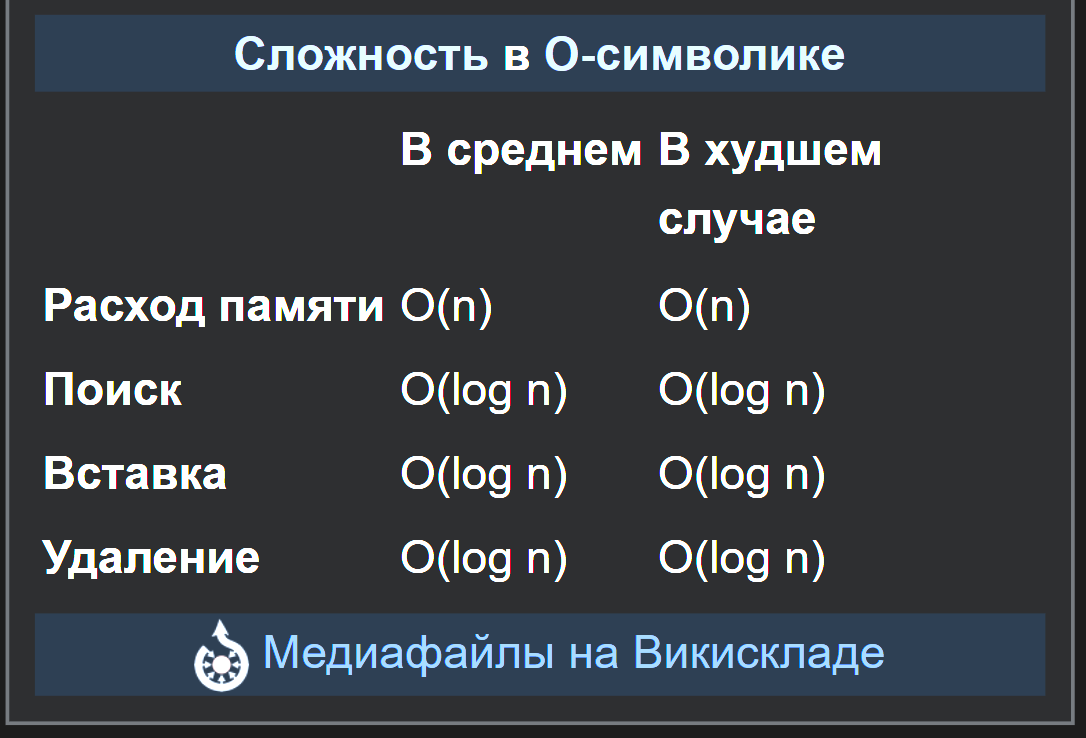